In [ ]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

In [124]:
X = pd.read_csv("feature_data_1-6.csv")
Y = pd.read_csv("data_output.csv")
Y = Y[["PDB code 1","PDB code 2", "Output"]]
Y["PDB codes"] = Y["PDB code 1"] +" , "+ Y["PDB code 2"]
Y = Y[["PDB codes","Output"]]
Y.set_index("PDB codes",inplace=True)
X["PDB codes"] = X["PDB code 1"] +" , "+ X["PDB code 2"]
X.set_index("PDB codes", inplace=True)
X.drop(["PDB code 1", "PDB code 2"],axis=1,inplace=True)
df, right = X.align(Y,join="right",axis = 0)
df.dropna(inplace=True)
Y = Y[Y.index.isin(df.index)]
df["Output"] = Y["Output"]
df.to_csv("features_outputs.csv")


In [123]:
df

,VDWAALS 1,EEL 1,EGB 1,ESURF 1,GGAS 1,GSOLV 1,TOTAL 1,VDWAALS 2,EEL 2,EGB 2,ESURF 2,GGAS 2,GSOLV 2,TOTAL 2,Output
PDB codes,,,,,,,,,,,,,,,
"1exd , 1il2",-297.43,2853.31,-2769.40,-39.57,2555.87,-2808.97,-253.10,-377.15,14928.76,-14798.97,-47.50,14551.61,-14846.48,-294.87,1
"1exd , 1je8",-297.43,2853.31,-2769.40,-39.57,2555.87,-2808.97,-253.10,-309.02,-25367.65,25386.51,-44.66,-25676.67,25341.85,-334.82,0
"1exd , 1omh",-297.43,2853.31,-2769.40,-39.57,2555.87,-2808.97,-253.10,-270.05,-5246.08,5238.97,-34.09,-5516.13,5204.88,-311.25,1
"1exd , 1osb",-297.43,2853.31,-2769.40,-39.57,2555.87,-2808.97,-253.10,-563.32,-11193.39,11154.77,-72.18,-11756.71,11082.59,-674.11,1
"1exd , 1rkj",-297.43,2853.31,-2769.40,-39.57,2555.87,-2808.97,-253.10,-119.28,-801.67,834.16,-15.17,-920.95,818.99,-101.96,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"5yts , 5wzj",-57.48,-136.57,171.71,-7.00,-194.05,164.71,-29.34,-230.34,130.79,-82.34,-28.29,-99.55,-110.64,-210.19,0
"5yts , 5wzk",-57.48,-136.57,171.71,-7.00,-194.05,164.71,-29.34,-176.42,735.87,-706.76,-21.41,559.45,-728.16,-168.71,0
"5yts , 5ytx",-57.48,-136.57,171.71,-7.00,-194.05,164.71,-29.34,-62.74,-206.72,236.49,-7.07,-269.47,229.41,-40.05,0


In [126]:
from sklearn import model_selection
from matplotlib import pyplot as plt

In [129]:
X_train,X_test,Y_train,Y_test = model_selection.train_test_split(df,Y,test_size=0.33)

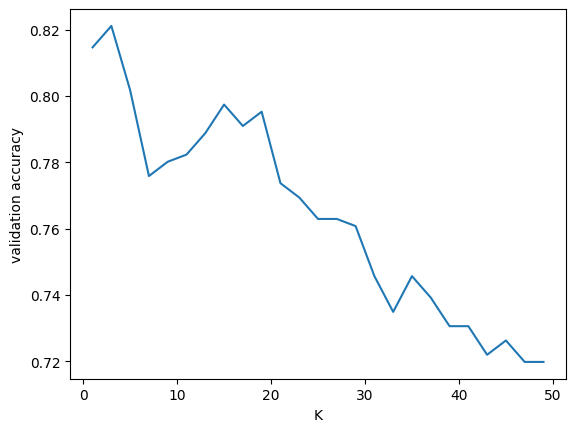

In [131]:
val_acc = []
train_acc = []
for k in range(1,50,2):
    knn = KNeighborsClassifier(k)
    knn.fit(X_train,Y_train["Output"])
    pred = knn.predict(X_train)
    train_acc.append((np.sum(pred == Y_train["Output"]))/len(pred))
    pred = knn.predict(X_test)
    val_acc.append((np.sum(pred == Y_test["Output"]))/len(pred))

plt.plot(np.arange(1,50,2),val_acc)
plt.xlabel("K")
plt.ylabel("validation accuracy")
plt.show()

In [132]:
print(val_acc)

[0.8146551724137931, 0.8211206896551724, 0.8017241379310345, 0.7758620689655172, 0.7801724137931034, 0.7823275862068966, 0.7887931034482759, 0.7974137931034483, 0.790948275862069, 0.7952586206896551, 0.7737068965517241, 0.7693965517241379, 0.7629310344827587, 0.7629310344827587, 0.7607758620689655, 0.7456896551724138, 0.7349137931034483, 0.7456896551724138, 0.7392241379310345, 0.7306034482758621, 0.7306034482758621, 0.7219827586206896, 0.7262931034482759, 0.7198275862068966, 0.7198275862068966]
